In [27]:
## Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [28]:
## Numerical differentiation
def FD1(x):
    y  = np.zeros_like(x)
    y  = (np.roll(x,-1)-x)/dx
    return y

def FD2(x):
    y  = np.zeros_like(x)
    y  = (np.roll(x,-1)-np.roll(x,1))/(2*dx) 
    return y
    
def FD4(x):
    a=4/3
    b=-1/3
    y=np.zeros_like(x)
    y=a*(np.roll(x, -1)-np.roll(x, 1))/(2*dx)+b*(np.roll(x, -2)-np.roll(x, 2))/(4*dx)    
    return y

def FD6(x):
    a=3/2
    b=-3/5
    c=1/10
    y=np.zeros_like(x)
    y=a*(np.roll(x, -1)-np.roll(x, 1))/(2*dx)+b*(np.roll(x, -2)-np.roll(x, 2))/(4*dx)+c*(np.roll(x, -3)-np.roll(x, 3))/(6*dx)     
      
    return y

def FFT(Y):
    N = len(x)
    L    = x[-1]-x[0]+x[1]-x[0]
    if np.mod(len(x),2) == 0:
        omega = (0+1j)*(2*np.pi/L)*(np.linspace(-(N/2),(N/2)-1,N))        
    else:
        omega = (0+1j)*(2*np.pi/L)*(np.linspace(-np.floor(N/2),np.floor(N/2),N))

    omega  = np.fft.fftshift(omega)
    Yhat   = np.fft.fft(Y)
    Yd1hat = Yhat*omega
    Yd1Fft = np.real(np.fft.ifft(Yd1hat))
    return Yd1Fft

In [14]:
## Numerical integration
def RK4(func, X0, t):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X = np.ndarray((nt,N))
    #X  = np.zeros([nt, len(X0)])
    X[0,:] = X0
    
    for i in range(nt-1):
        k1 = func(X[i], t[i])       
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2.)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2.)
        k4 = func(X[i] + dt    * k3, t[i] + dt)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

def RK4test(func, X0, t):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X = np.ndarray((nt,N))
    X[0,:] = X0
    
    for i in range(nt-1):
        k1 = func(X[i], t[i])       
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2.)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2.)
        k4 = func(X[i] + dt    * k3, t[i] + dt)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

In [29]:
## Setup fields and conditions
def f(x):
    y = np.exp(-x**2)
    return y

def df(x):
    y = -2*x*np.exp(-x**2)
    return y

D    = 10
N    = 64
tmax = 10
Nt   = 20000
c    = 5

t     = np.linspace(0,tmax,Nt)
x     = np.linspace(-D,D,N+1)[0:N]
xx,tt = np.meshgrid(x,t)
dt    = t[1] - t[0]
dx    = x[1] - x[0]
CFL   = c*dt/dx

In [30]:
def error_calc(y,y_real):    # Root Mean Square
    A = y-y_real
    RMS = np.sqrt(np.sum(A**2)/np.prod((A).shape))
    return RMS

x0=f(x)
#D'Alambert wave solution
yreal=np.zeros((Nt,N))
yreal=f(np.mod(xx+c*tt+D,2*D)-D)

#numerical solution
y1=np.zeros((Nt,N))
y2=np.zeros((Nt,N))
y4=np.zeros((Nt,N))
y6=np.zeros((Nt,N))

error1=np.zeros(Nt)
error2=np.zeros(Nt)
error4=np.zeros(Nt)
error6=np.zeros(Nt)

ic= f(x)  
y1[0,:]=ic
y2[0,:]=ic
y4[0,:]=ic
y6[0,:]=ic
    
for i in range(1,Nt):
    y1[i,:] = y1[i-1,:]+c*FD1(y1[i-1,:])*dt
    y2[i,:] = y2[i-1,:]+c*FD2(y2[i-1,:])*dt
    y4[i,:] = y4[i-1,:]+c*FD4(y4[i-1,:])*dt
    y6[i,:] = y6[i-1,:]+c*FD6(y6[i-1,:])*dt
    error1[i] = error_calc(y1[i,:],yreal[i,:])
    error2[i] = error_calc(y2[i,:],yreal[i,:])
    error4[i] = error_calc(y4[i,:],yreal[i,:])
    error6[i] = error_calc(y6[i,:],yreal[i,:])

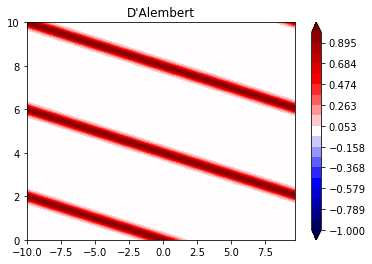

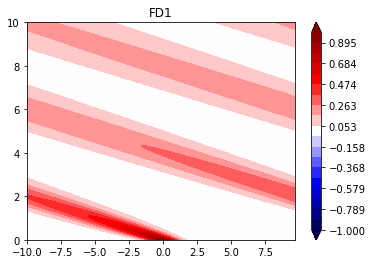

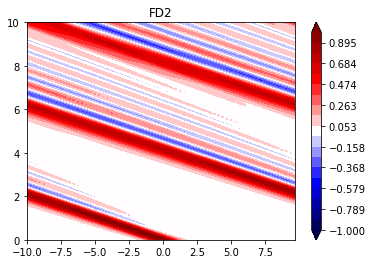

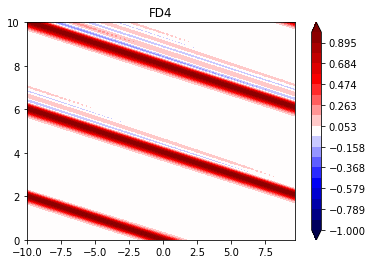

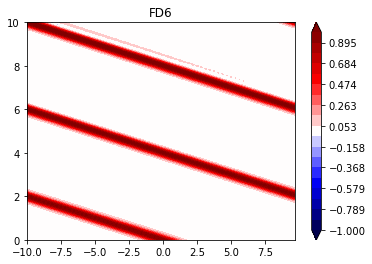

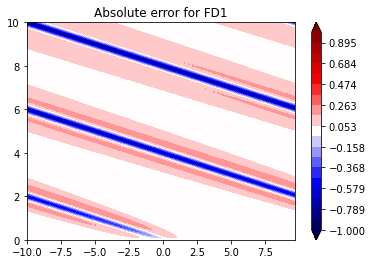

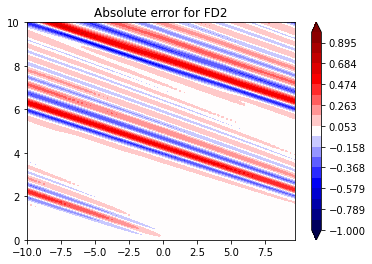

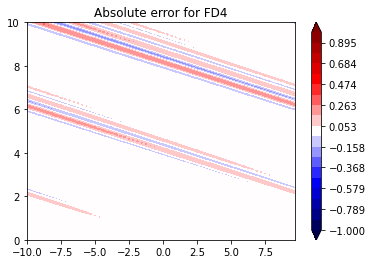

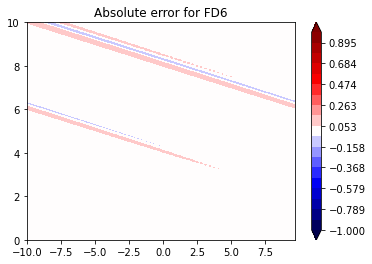

[]

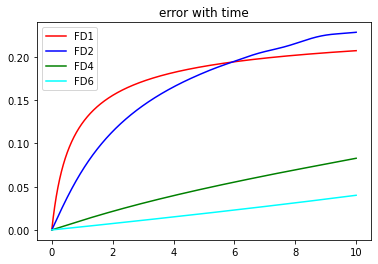

In [31]:
## Solution
# Analytical
plt.contourf(x,t,yreal,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("D'Alembert")
plt.show()
# Sp: Fd1, Tp: Fd1
plt.contourf(x,t,y1,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("FD1")
plt.show()

# Sp: Fd2, Tp: Fd1
plt.contourf(x,t,y2,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("FD2")
plt.show()

# Sp: Fd4, Tp: Fd1
plt.contourf(x,t,y4,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("FD4")
plt.show()

# Sp: Fd6, Tp: Fd1
plt.contourf(x,t,y6,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("FD6")
plt.show()

## Absolute error
# Sp: Fd1, Tp: Fd1
plt.contourf(x,t,y1-yreal,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("Absolute error for FD1")
plt.show()

# Sp: Fd2, Tp: Fd1
plt.contourf(x,t,y2-yreal,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("Absolute error for FD2")
plt.show()

# Sp: Fd4, Tp: Fd1
plt.contourf(x,t,y4-yreal,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("Absolute error for FD4")
plt.show()

# Sp: Fd6, Tp: Fd1
plt.contourf(x,t,y6-yreal,cmap='seismic',levels=np.linspace(-1,1,20),extend ='both') 
plt.colorbar(orientation='vertical')
plt.title("Absolute error for FD6")
plt.show()

#calculate error with time

fig, ax = plt.subplots()
f1=ax.plot(t,error1,color='red',label='FD1') 
f1=ax.plot(t,error2,color='blue',label='FD2')
f1=ax.plot(t,error4,color='green',label='FD4')
f1=ax.plot(t,error6,color='cyan',label='FD6')
ax.legend()        
plt.title('error with time')
plt.plot()